In [1]:
import mne
from mne.preprocessing import ICA
import numpy as np
easycap_montage = mne.channels.make_standard_montage('easycap-M1')
    
GA=dict()
Ids=range(26,35)

states=['attend','ignore']

for id in Ids:
    evoked=dict()
    for state in states:
        input_fname='S:/psy-interbrain/Shared/Jan/CIBA120_data/raw/ciba%03d_ob_%s.vhdr'%(id,state)
        raw=mne.io.read_raw_brainvision(vhdr_fname=input_fname,preload=True)
        raw.set_montage(easycap_montage)
        raw.plot(n_channels=32,block=True,scalings=dict(eeg=80e-6))
        eeg=raw.filter(None,20).set_eeg_reference('average')
        ica = ICA(method='fastica')    
        ica.fit(eeg.copy().filter(1,None),reject = dict(eeg=300e-6),decim=5)
        ica.plot_sources(eeg,block = True) 
        print('reject ICA component: %s'%(ica.exclude))
        events=mne.events_from_annotations(eeg)[0]
        
        if np.count_nonzero(events[:,2] == 1) > np.count_nonzero(events[:,2] == 2):
            event_id = {'%s/standard'%(state): 1, '%s/deviant'%(state): 2} 
        else:
            event_id = {'%s/standard'%(state): 2, '%s/deviant'%(state): 1}
            
        ica.apply(eeg,exclude=ica.exclude)    
        epochs=mne.Epochs(eeg, events=events, event_id=event_id, tmin=-0.1, tmax=0.45,reject=dict(eeg=100e-6),baseline=(None,0))

        epochs.equalize_event_counts(event_ids=event_id)

        for condition in event_id.keys():
            evoked[condition]=epochs[condition].average()
        GA[id]=evoked
        #mne.viz.plot_compare_evokeds(evoked,picks=['Cz'])

Extracting parameters from S:/psy-interbrain/Shared/Jan/CIBA120_data/raw/ciba026_ob_attend.vhdr...
Setting channel info structure...
Reading 0 ... 351407  =      0.000 ...   351.407 secs...
Using qt as 2D backend.
Opening raw-browser...
Closing raw-browser...
Channels marked as bad:
none
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (0.661 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 31 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 31 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 31 sensor positions
Interpolating 1 sensors
Identifying common channels ...
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 31 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 31 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 31 sensor positions
Interpolating 1 sensors
Identifying common channels ...


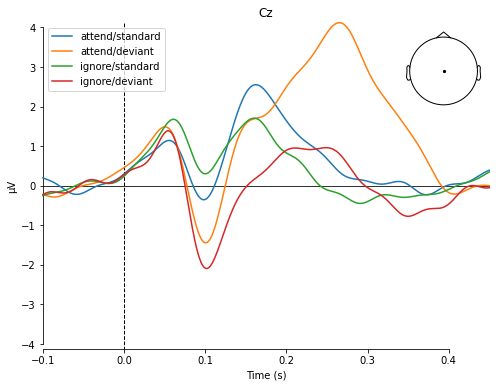

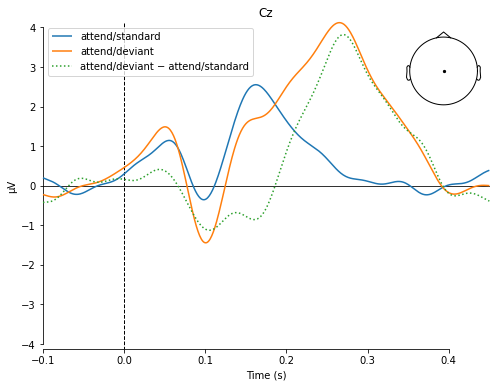

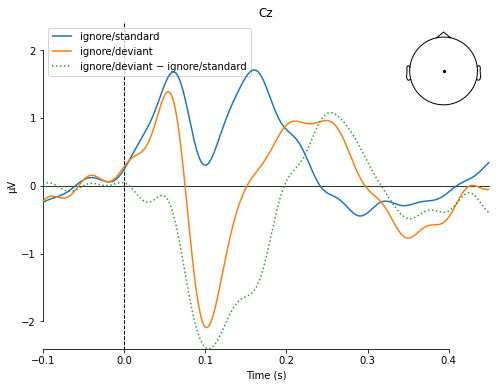

[<Figure size 576x432 with 2 Axes>]

In [11]:
GA_evk=dict()
for cond in evoked.keys():
    GA_evk[cond]=mne.grand_average([sub[cond] for sub in GA.values()])
    GA_evk[cond].comment=cond
mne.viz.plot_compare_evokeds(GA_evk,picks=['Cz'])
diff_attend=mne.combine_evoked([GA_evk['attend/deviant'],GA_evk['attend/standard'],], weights=[1,-1])
diff_ignore=mne.combine_evoked([GA_evk['ignore/deviant'],GA_evk['ignore/standard'],], weights=[1,-1])

mne.viz.plot_compare_evokeds([GA_evk['attend/standard'],GA_evk['attend/deviant'],diff_attend],picks=['Cz'],linestyles=['solid','solid','dotted'])
mne.viz.plot_compare_evokeds([GA_evk['ignore/standard'],GA_evk['ignore/deviant'],diff_ignore],picks=['Cz'],linestyles=['solid','solid','dotted'])

{'attend/standard': <Evoked | 'attend/standard' (average, N=9), -0.1 – 0.45 sec, baseline -0.1 – 0 sec, 32 ch, ~188 kB>,
 'attend/deviant': <Evoked | 'attend/deviant' (average, N=9), -0.1 – 0.45 sec, baseline -0.1 – 0 sec, 32 ch, ~188 kB>,
 'ignore/standard': <Evoked | 'ignore/standard' (average, N=9), -0.1 – 0.45 sec, baseline -0.1 – 0 sec, 32 ch, ~188 kB>,
 'ignore/deviant': <Evoked | 'ignore/deviant' (average, N=9), -0.1 – 0.45 sec, baseline -0.1 – 0 sec, 32 ch, ~188 kB>}